In [ ]:
! pip install shap

In [ ]:
! pip install optuna

In [ ]:
! pip install optuna-integration

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering  import
from sklearn.model_selection import train_test_split ,learning_curve

# Model import
import xgboost as xgb
from xgboost import XGBClassifier ,XGBRegressor

# Evaluate import
import optuna
import shap
# print the JS visualization code to the notebook
shap.plots.initjs()
from sklearn import metrics
from sklearn.metrics import accuracy_score ,roc_auc_score ,roc_curve ,classification_report ,confusion_matrix

# sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)
pd.set_option('display.unicode.ambiguous_as_wide', True)
pd.set_option('display.unicode.east_asian_width', True)
pd.set_option("display.precision", 2)
plt.rcParams['axes.unicode_minus'] = False # 正常顯示負號

# Load Data

In [113]:
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
X = df.drop(columns =['Class'])
y = df['Class']

print('X:', X.shape) # (284807, 30)
print('Y:', y.shape) # (284807,)

X: (284807, 30)
Y: (284807,)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,2.85e+05,284807.00,2.85e+05
mean,94813.86,1.17e-15,3.42e-16,-1.38e-15,2.07e-15,9.60e-16,1.49e-15,-5.56e-16,1.21e-16,-2.41e-15,2.24e-15,1.67e-15,-1.25e-15,8.19e-16,1.21e-15,4.89e-15,1.44e-15,-3.77e-16,9.56e-16,1.04e-15,6.41e-16,1.65e-16,-3.57e-16,2.58e-16,4.47e-15,5.34e-16,1.68e-15,-3.66e-16,-1.23e-16,88.35,1.73e-03
std,47488.15,1.96e+00,1.65e+00,1.52e+00,1.42e+00,1.38e+00,1.33e+00,1.24e+00,1.19e+00,1.10e+00,1.09e+00,1.02e+00,9.99e-01,9.95e-01,9.59e-01,9.15e-01,8.76e-01,8.49e-01,8.38e-01,8.14e-01,7.71e-01,7.35e-01,7.26e-01,6.24e-01,6.06e-01,5.21e-01,4.82e-01,4.04e-01,3.30e-01,250.12,4.15e-02
min,0.00,-5.64e+01,-7.27e+01,-4.83e+01,-5.68e+00,-1.14e+02,-2.62e+01,-4.36e+01,-7.32e+01,-1.34e+01,-2.46e+01,-4.80e+00,-1.87e+01,-5.79e+00,-1.92e+01,-4.50e+00,-1.41e+01,-2.52e+01,-9.50e+00,-7.21e+00,-5.45e+01,-3.48e+01,-1.09e+01,-4.48e+01,-2.84e+00,-1.03e+01,-2.60e+00,-2.26e+01,-1.54e+01,0.00,0.00e+00
25%,54201.50,-9.20e-01,-5.99e-01,-8.90e-01,-8.49e-01,-6.92e-01,-7.68e-01,-5.54e-01,-2.09e-01,-6.43e-01,-5.35e-01,-7.62e-01,-4.06e-01,-6.49e-01,-4.26e-01,-5.83e-01,-4.68e-01,-4.84e-01,-4.99e-01,-4.56e-01,-2.12e-01,-2.28e-01,-5.42e-01,-1.62e-01,-3.55e-01,-3.17e-01,-3.27e-01,-7.08e-02,-5.30e-02,5.60,0.00e+00
50%,84692.00,1.81e-02,6.55e-02,1.80e-01,-1.98e-02,-5.43e-02,-2.74e-01,4.01e-02,2.24e-02,-5.14e-02,-9.29e-02,-3.28e-02,1.40e-01,-1.36e-02,5.06e-02,4.81e-02,6.64e-02,-6.57e-02,-3.64e-03,3.73e-03,-6.25e-02,-2.95e-02,6.78e-03,-1.12e-02,4.10e-02,1.66e-02,-5.21e-02,1.34e-03,1.12e-02,22.00,0.00e+00
75%,139320.50,1.32e+00,8.04e-01,1.03e+00,7.43e-01,6.12e-01,3.99e-01,5.70e-01,3.27e-01,5.97e-01,4.54e-01,7.40e-01,6.18e-01,6.63e-01,4.93e-01,6.49e-01,5.23e-01,4.00e-01,5.01e-01,4.59e-01,1.33e-01,1.86e-01,5.29e-01,1.48e-01,4.40e-01,3.51e-01,2.41e-01,9.10e-02,7.83e-02,77.16,0.00e+00
max,172792.00,2.45e+00,2.21e+01,9.38e+00,1.69e+01,3.48e+01,7.33e+01,1.21e+02,2.00e+01,1.56e+01,2.37e+01,1.20e+01,7.85e+00,7.13e+00,1.05e+01,8.88e+00,1.73e+01,9.25e+00,5.04e+00,5.59e+00,3.94e+01,2.72e+01,1.05e+01,2.25e+01,4.58e+00,7.52e+00,3.52e+00,3.16e+01,3.38e+01,25691.16,1.00e+00


列出標籤個數，或是可以用圖表視覺化呈現

In [8]:
counts = np.bincount(y)
for i, count in enumerate(counts):
    print(f"Class {i}: {count} instances")

Class 0: 284315 instances
Class 1: 492 instances


In [ ]:
# # Scatter plot matrix 散點圖矩陣
# sns.pairplot(df)

# Split Data

資料分割，將資料集拆分為訓練集和測試集，並使用stratify=y，讓訓練資料的分佈與測試資料產生相同的分佈。因為改變的類別的比例是一個嚴重的問題，因此訓練資料的分佈必須要與實際情況越接近越好。

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 ,stratify=y)

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('='*30)
# 查看全部資料的類別比例
print(pd.Series(y).value_counts(normalize=True))
# 查看訓練集標籤的分佈
print(pd.Series(y_train).value_counts(normalize=True))
# 查看測試集的標籤分佈
print(pd.Series(y_test).value_counts(normalize=True))

X_train: (199364, 30)
X_test: (85443, 30)
y_train: (199364,)
y_test: (85443,)
Class
0    9.98e-01
1    1.73e-03
Name: proportion, dtype: float64
Class
0    9.98e-01
1    1.73e-03
Name: proportion, dtype: float64
Class
0    9.98e-01
1    1.73e-03
Name: proportion, dtype: float64


In [11]:
# 列出訓練資料和測試資料的標籤個數
from collections import Counter
print(f"Training target statistics: {Counter(y_train)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 199020, 1: 344})
Testing target statistics: Counter({0: 85295, 1: 148})


# Optuna


In [115]:
def objective(trial):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
  dtrain = xgb.DMatrix(X_train ,label=y_train)
  dtest = xgb.DMatrix(X_test, label=y_test)
  params = {
    "verbosity": 0,
    'task': 'train',
    "eval_metric": "auc",
    "objective": "binary:logistic",
    "tree_method": "exact",
    "booster": trial.suggest_categorical("booster", ["gbtree"]), # ,"dart" ,"gblinear" # optuna只接受gbtree
    # L2 regularization weight.
    "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
    # L1 regularization weight.
    "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
    # sampling ratio for training data.
    "subsample": trial.suggest_float("subsample", 0.2, 1.0),
    # sampling according to each tree.
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
  }
  if params["booster"] == "gbtree" or params["booster"] == "dart":
    # maximum depth of the tree, signifies complexity of the tree.
    params["max_depth"] = trial.suggest_int("max_depth", 1, 10)
    # minimum child weight, larger the term more conservative the tree.
    params["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
    params["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
    # defines how selective algorithm is.
    params["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
    params["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

  #   # Additional parameters for Dart Booster
  # if params["booster"] == "dart":
  #   params["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
  #   params["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
  #   params["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
  #   params["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

  bst = xgb.train(params, dtrain)
  preds = bst.predict(dtest)
  pred_labels = np.rint(preds)
  accuracy = accuracy_score(y_test, pred_labels)
  print("Accuracy:", accuracy)
  return accuracy

In [148]:
# 最大化評估函數的返回值（例如準確率）時，應選擇 "maximize"
# 最小化評估函數的返回值（例如損失函數）時，應選擇 "minimize"
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=25, timeout=600)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
  print("    {}: {}".format(key, value))

[I 2024-06-14 07:29:42,117] A new study created in memory with name: no-name-eef481f7-ca42-4ff1-804b-e716d10fd899
[I 2024-06-14 07:29:48,812] Trial 0 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 5.0980692338185625e-05, 'alpha': 0.0026216612076948556, 'subsample': 0.6589997456771026, 'colsample_bytree': 0.48137926249474394, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.002700145162129499, 'gamma': 0.0069818158302495555, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:02,903] Trial 1 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 5.010354165113619e-05, 'alpha': 0.003507680149353742, 'subsample': 0.6815761349679034, 'colsample_bytree': 0.7263001823567805, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.016668774102146386, 'gamma': 2.6642880907301784e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:06,853] Trial 2 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.09687035718929458, 'alpha': 3.1318635545501074e-05, 'subsample': 0.9320691344629413, 'colsample_bytree': 0.7283491257236936, 'max_depth': 1, 'min_child_weight': 9, 'eta': 2.575584418675688e-08, 'gamma': 1.9806567556337848e-08, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:11,146] Trial 3 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.8166213319838014, 'alpha': 1.7312478493440244e-08, 'subsample': 0.22343010152620923, 'colsample_bytree': 0.9396852607627659, 'max_depth': 3, 'min_child_weight': 3, 'eta': 2.2297478306075827e-08, 'gamma': 0.1656832478155378, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:24,385] Trial 4 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.0027308356344920705, 'alpha': 2.0341511393269983e-07, 'subsample': 0.61116759903017, 'colsample_bytree': 0.9279795713101089, 'max_depth': 7, 'min_child_weight': 4, 'eta': 1.2463075302494816e-05, 'gamma': 1.9346592988774784e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:46,014] Trial 5 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 1.7870819694710427e-05, 'alpha': 3.635199493792342e-05, 'subsample': 0.9665599055276946, 'colsample_bytree': 0.9553638816049601, 'max_depth': 10, 'min_child_weight': 2, 'eta': 7.016588964704802e-05, 'gamma': 0.05297230805804022, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:49,606] Trial 6 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.18485709812119744, 'alpha': 5.9739163483538446e-05, 'subsample': 0.5433680137914797, 'colsample_bytree': 0.384463845507353, 'max_depth': 4, 'min_child_weight': 10, 'eta': 6.846472102829898e-05, 'gamma': 0.00322648863452653, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:30:57,790] Trial 7 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 2.9088094767395533e-07, 'alpha': 7.447048521852208e-06, 'subsample': 0.80393520580006, 'colsample_bytree': 0.3168056030054276, 'max_depth': 8, 'min_child_weight': 6, 'eta': 5.350754188476294e-06, 'gamma': 2.1318956075349676e-05, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:31:01,619] Trial 8 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 6.987659066169575e-06, 'alpha': 0.35516408428735957, 'subsample': 0.9996468408557511, 'colsample_bytree': 0.25736347739489623, 'max_depth': 6, 'min_child_weight': 10, 'eta': 0.031137883060898694, 'gamma': 0.0009042294605628454, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 0.9982678510820079.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:31:13,856] Trial 9 finished with value: 0.9994148145547324 and parameters: {'booster': 'gbtree', 'lambda': 0.023402848125532446, 'alpha': 0.23059015120369625, 'subsample': 0.9809859460896422, 'colsample_bytree': 0.8116956898525844, 'max_depth': 6, 'min_child_weight': 7, 'eta': 0.6316044723855695, 'gamma': 0.007653274033607102, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9994148145547324


[I 2024-06-14 07:31:18,157] Trial 10 finished with value: 0.999204147794436 and parameters: {'booster': 'gbtree', 'lambda': 0.0031040135761193064, 'alpha': 0.31114941245213595, 'subsample': 0.3846948564381929, 'colsample_bytree': 0.7097329160887793, 'max_depth': 4, 'min_child_weight': 8, 'eta': 0.3100154347173218, 'gamma': 4.903559695644575e-05, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.999204147794436


[I 2024-06-14 07:31:23,605] Trial 11 finished with value: 0.9993211848834895 and parameters: {'booster': 'gbtree', 'lambda': 0.0026406834277988896, 'alpha': 0.9131670855838492, 'subsample': 0.33395618946999117, 'colsample_bytree': 0.7138950727580009, 'max_depth': 4, 'min_child_weight': 8, 'eta': 0.8159143246064328, 'gamma': 2.4554241640340498e-05, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9993211848834895


[I 2024-06-14 07:31:28,287] Trial 12 finished with value: 0.9993562960102056 and parameters: {'booster': 'gbtree', 'lambda': 0.0039574653266434435, 'alpha': 0.023544475630806208, 'subsample': 0.41817210225862966, 'colsample_bytree': 0.6175349688167592, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.812773223167412, 'gamma': 4.776677259450251e-06, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9993562960102056


[I 2024-06-14 07:31:33,851] Trial 13 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.015251657249132149, 'alpha': 0.008724120074322824, 'subsample': 0.47172381555756077, 'colsample_bytree': 0.5406572922164872, 'max_depth': 6, 'min_child_weight': 7, 'eta': 0.0024883872111688666, 'gamma': 1.2581997206655544e-06, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:31:40,530] Trial 14 finished with value: 0.9990519995786665 and parameters: {'booster': 'gbtree', 'lambda': 0.0007395191675861014, 'alpha': 0.04401353989627204, 'subsample': 0.7932741066365149, 'colsample_bytree': 0.8346422168771797, 'max_depth': 2, 'min_child_weight': 5, 'eta': 0.09692632083264673, 'gamma': 0.00044510551478085613, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9990519995786665


[I 2024-06-14 07:31:45,576] Trial 15 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 1.0240632229830317e-08, 'alpha': 0.03026075465027297, 'subsample': 0.4372379796476556, 'colsample_bytree': 0.6024565153360847, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.007752449782876114, 'gamma': 0.6686105553032347, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:31:51,446] Trial 16 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.09596246878406056, 'alpha': 0.0006511456326121074, 'subsample': 0.2555323625484217, 'colsample_bytree': 0.8398015577557557, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.0006987526752881822, 'gamma': 3.1909109958792134e-06, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:32:00,472] Trial 17 finished with value: 0.9993797034280163 and parameters: {'booster': 'gbtree', 'lambda': 0.01873150181991502, 'alpha': 0.06744989631520178, 'subsample': 0.8150952339247398, 'colsample_bytree': 0.6151862745337207, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.7961282681530275, 'gamma': 0.008631256013497263, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9993797034280163


[I 2024-06-14 07:32:10,930] Trial 18 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.0003201929295591675, 'alpha': 0.0005436352813339536, 'subsample': 0.8511612986065674, 'colsample_bytree': 0.44827073603989814, 'max_depth': 8, 'min_child_weight': 9, 'eta': 2.2909736631058375e-07, 'gamma': 0.016144244273022725, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:32:23,598] Trial 19 finished with value: 0.9986657771847899 and parameters: {'booster': 'gbtree', 'lambda': 0.020132707232328045, 'alpha': 0.1021906445776507, 'subsample': 0.8705170597337654, 'colsample_bytree': 0.8100281130319128, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.060280358375293885, 'gamma': 0.00041942915300452287, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9986657771847899


[I 2024-06-14 07:32:30,494] Trial 20 finished with value: 0.9982678510820079 and parameters: {'booster': 'gbtree', 'lambda': 0.9522009393394569, 'alpha': 1.068865269661208e-06, 'subsample': 0.7315019215331491, 'colsample_bytree': 0.6604878478733398, 'max_depth': 10, 'min_child_weight': 6, 'eta': 0.00035792180290009605, 'gamma': 0.061587261563353195, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9982678510820079


[I 2024-06-14 07:32:36,946] Trial 21 finished with value: 0.9992509626300574 and parameters: {'booster': 'gbtree', 'lambda': 0.017493600138028233, 'alpha': 0.014083186650419773, 'subsample': 0.5206652721376994, 'colsample_bytree': 0.600127057374135, 'max_depth': 6, 'min_child_weight': 7, 'eta': 0.9867691339625241, 'gamma': 0.0027504392074073837, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9992509626300574


[I 2024-06-14 07:32:46,531] Trial 22 finished with value: 0.9993445923013002 and parameters: {'booster': 'gbtree', 'lambda': 0.0004416685536531854, 'alpha': 0.09209977639552651, 'subsample': 0.9023672139044473, 'colsample_bytree': 0.5093231771320736, 'max_depth': 8, 'min_child_weight': 9, 'eta': 0.15347149561159323, 'gamma': 0.00013174423100876278, 'grow_policy': 'lossguide'}. Best is trial 9 with value: 0.9994148145547324.


Accuracy: 0.9993445923013002


[I 2024-06-14 07:32:55,762] Trial 23 finished with value: 0.9994265182636377 and parameters: {'booster': 'gbtree', 'lambda': 0.02298622676752593, 'alpha': 0.0004660367756402273, 'subsample': 0.7399466474907652, 'colsample_bytree': 0.6524809467812508, 'max_depth': 5, 'min_child_weight': 7, 'eta': 0.26254795537112147, 'gamma': 0.9770684303290369, 'grow_policy': 'lossguide'}. Best is trial 23 with value: 0.9994265182636377.


Accuracy: 0.9994265182636377


[I 2024-06-14 07:33:00,964] Trial 24 finished with value: 0.9993094811745842 and parameters: {'booster': 'gbtree', 'lambda': 0.03596708424846382, 'alpha': 0.00027547034764899834, 'subsample': 0.7629884099950746, 'colsample_bytree': 0.7853174499453293, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.19629741038872112, 'gamma': 0.45708155437377584, 'grow_policy': 'lossguide'}. Best is trial 23 with value: 0.9994265182636377.


Accuracy: 0.9993094811745842
Number of finished trials:  25
Best trial:
  Value: 0.9994265182636377
  Params: 
    booster: gbtree
    lambda: 0.02298622676752593
    alpha: 0.0004660367756402273
    subsample: 0.7399466474907652
    colsample_bytree: 0.6524809467812508
    max_depth: 5
    min_child_weight: 7
    eta: 0.26254795537112147
    gamma: 0.9770684303290369
    grow_policy: lossguide


In [149]:
trial.params

{'booster': 'gbtree',
 'lambda': 0.02298622676752593,
 'alpha': 0.0004660367756402273,
 'subsample': 0.7399466474907652,
 'colsample_bytree': 0.6524809467812508,
 'max_depth': 5,
 'min_child_weight': 7,
 'eta': 0.26254795537112147,
 'gamma': 0.9770684303290369,
 'grow_policy': 'lossguide'}

In [150]:
from optuna.visualization import plot_optimization_history

plotly_config = {"staticPlot": True}

fig = plot_optimization_history(study)
fig.show(config=plotly_config)

我們運行了25次不同的參數組合來嘗試找到最佳的設置，從圖表中觀察Objective Value隨著每次Trial的變化情況，隨著試驗的進行，目標值有波動，但總體趨勢是逐漸上升的，Best Value逐漸提高。
大概在10次的時候，達到了一個穩定的高水平，且不再有明顯的上升。




In [151]:
from optuna.visualization import plot_param_importances

fig = plot_param_importances(study)
fig.show(config=plotly_config)

*   從optuna輸出的視覺化圖表中我們可以發現 eta(learning_rate:學習速率)最為重要，其他依序為colsample_bytree(每棵樹隨機選擇的特徵比例)，max_depth(決策樹的最大深度)，subsample(樣本隨機採樣)。
*   booster(助推器,可想像成樹的模型) 與 lambda(L2 正規化權重) 在此實作上無太大幫助。因此在下一次執行試驗的時候可以考慮將無用的參數移除，並將重要的超參數範圍加大取得更好的搜索結果。


In [152]:
# 最後將訓練好的params，傳遞給XGBClassifier，重新fit資料。
xgb_clf = xgb.XGBClassifier(**trial.params)
# xgb_clf.fit(X, y)
xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=0.0004660367756402273, base_score=None, booster='gbtree',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6524809467812508, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.26254795537112147, eval_metric=None, feature_types=None,
              gamma=0.9770684303290369, grow_policy='lossguide',
              importance_type=None, interaction_constraints=None,
              lambda=0.02298622676752593, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, ...)

# Shap

解釋模型

In [196]:
# Tree SHAP 來解釋整個資料集
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer(X ,y) #　返回一個shap.Explanation

In [182]:
print("X shape:", X.shape)
print("SHAP values shape:", shap_values.shape)

X shape: (284807, 30)
SHAP values shape: (284807, 30)


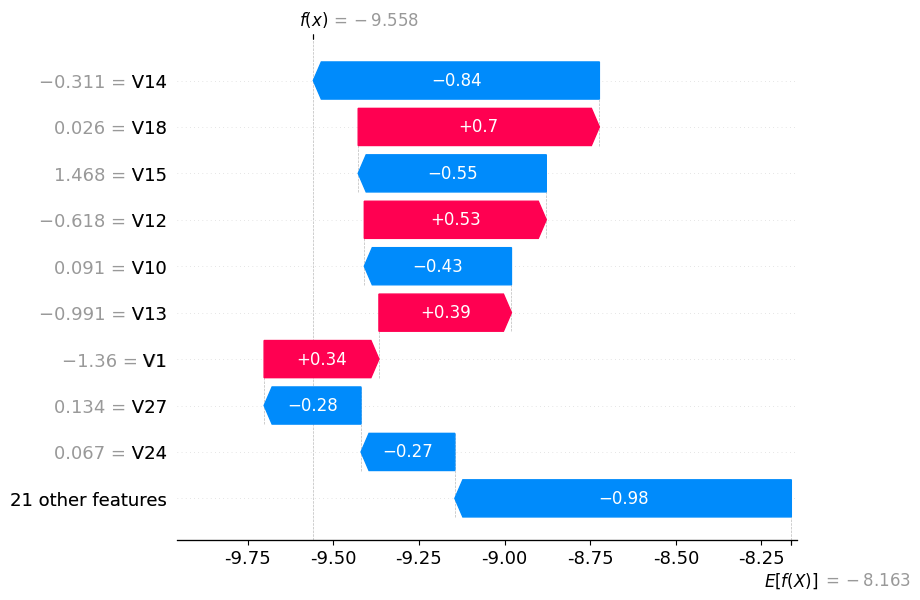

In [197]:
# waterfall 單筆資料解釋
shap.plots.waterfall(shap_values[0])

In [198]:
shap.plots.force(shap_values[0, ...])

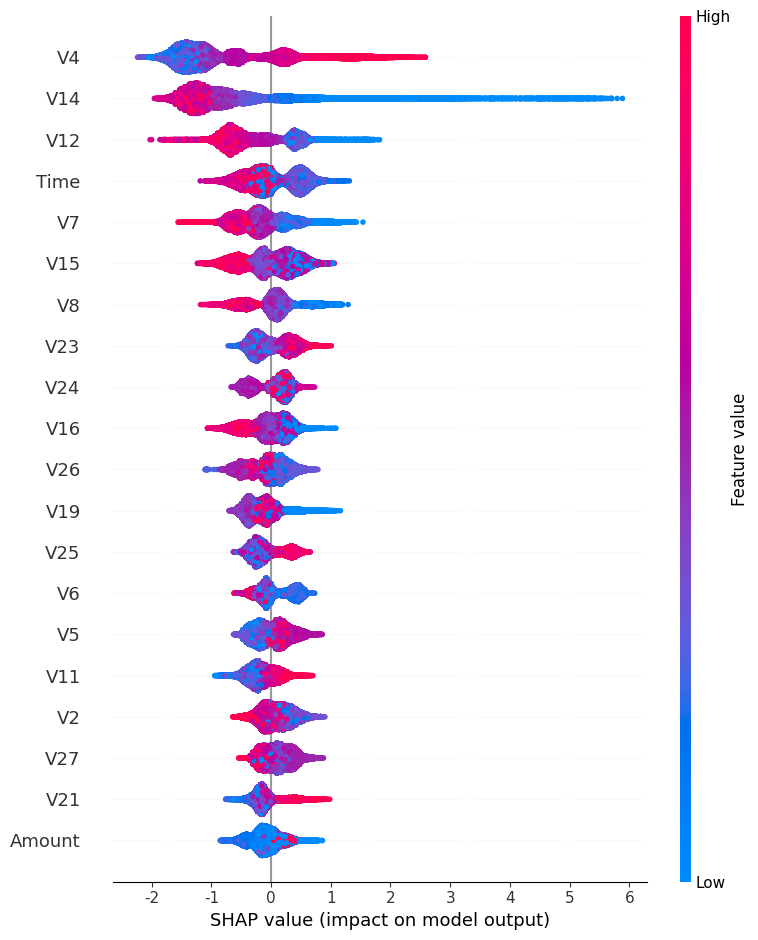

In [199]:
# SHAP Summary Plot
shap.summary_plot(shap_values, X)

In [ ]:
shap.plots.beeswarm(shap_values)

* V4越大，具有更大的總體模型影響
* V14越小，對於預測值的貢獻度越高，反之
* V12的大小,某種程度都會影響預測值




In [ ]:
# Bar chart of mean importance
shap.summary_plot(shap_values, X, plot_type="bar")

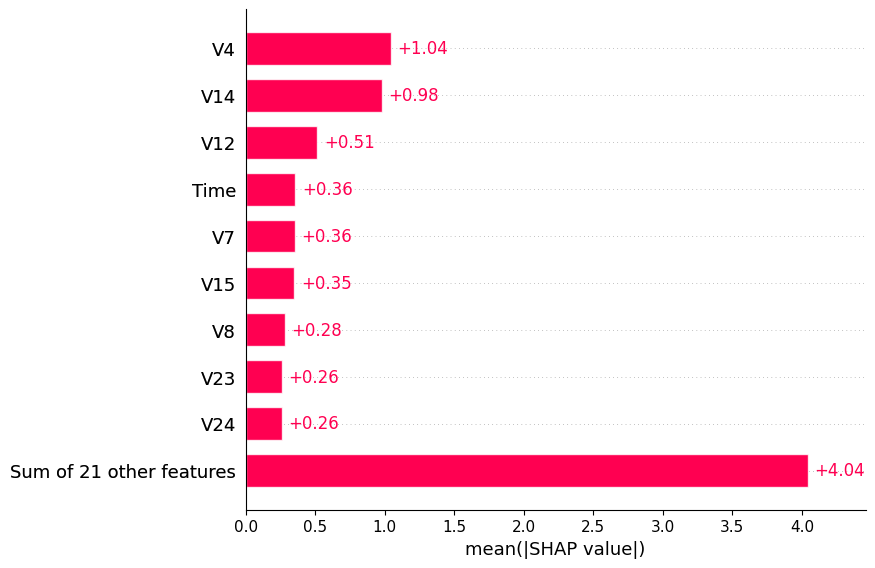

In [200]:
# Global bar plot
shap.plots.bar(shap_values)

* V4：+1.04
* V14：+0.98
* V12：+0.51

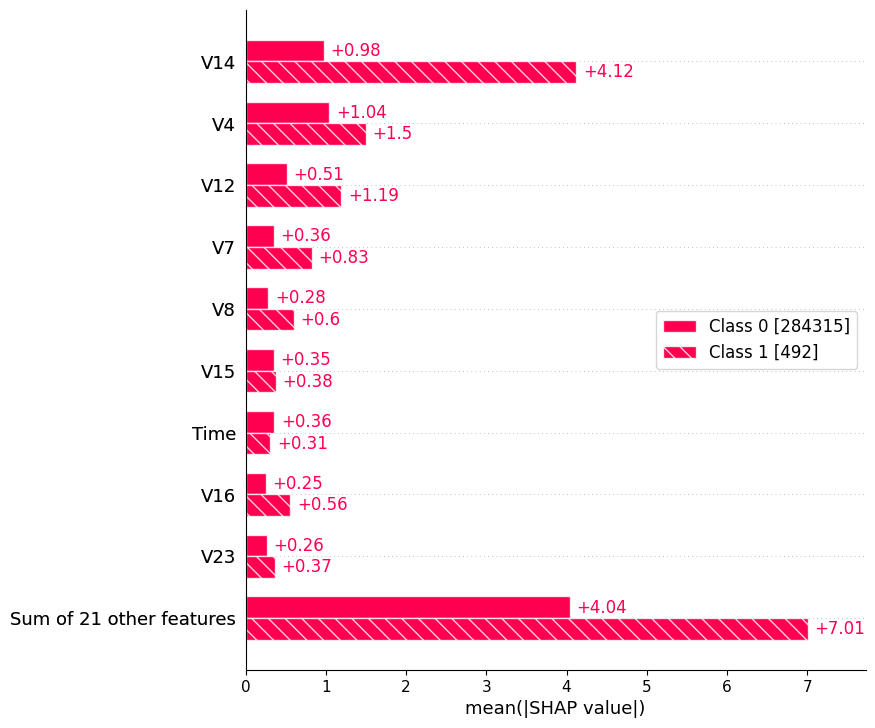

In [203]:
cohorts = ["Class 0" if y.iloc[i] == 0 else "Class 1" for i in range(len(y))]

shap_cohorts = shap_values.cohorts(cohorts)
shap.plots.bar(shap_cohorts.abs.mean(0))

* V14和V4對模型預測的影響最大，特別是對於Class1
* V12, V7, V8, V15, Time, V16, V23: 这些特徵也有一定的重要性，但影響不如V14和V4

In [ ]:
for name in X_train.columns:
    shap.dependence_plot(name, shap_values.values, X_train)

# Evaluate

Training Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.99      0.89      0.94       344

    accuracy                           1.00    199364
   macro avg       1.00      0.94      0.97    199364
weighted avg       1.00      1.00      1.00    199364

AUC:
0.9447599049295033


Testing Set Evaluation:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.76      0.84       148

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

AUC:
0.8817039986818405


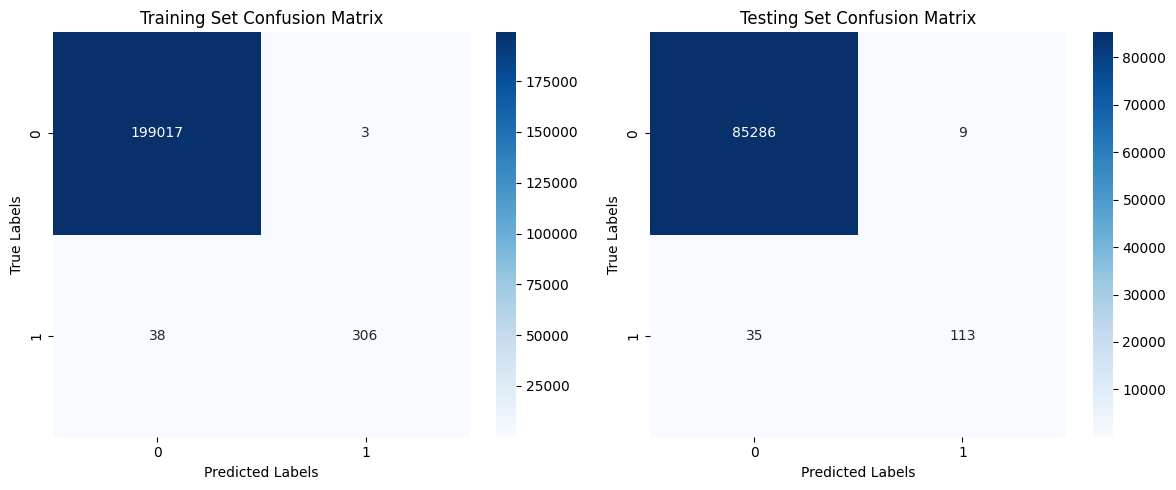

In [153]:
def evaluate_model_performance(model, X_train, X_test, y_train, y_test):
    # 訓練集上的模型評分
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_conf_matrix = confusion_matrix(y_train, y_train_pred)
    train_classification_report = classification_report(y_train, y_train_pred)
    train_auc = roc_auc_score(y_train, y_train_pred)
    print("Training Set Evaluation:")
    # print("Accuracy:", train_accuracy)
    # print("Confusion Matrix:")
    # print(train_conf_matrix)
    print("Classification Report:")
    print(train_classification_report)
    print("AUC:")
    print(train_auc)
    print("\n")

    # 測試集上的模型評分
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_conf_matrix = confusion_matrix(y_test, y_test_pred)
    test_classification_report = classification_report(y_test, y_test_pred)
    test_auc = roc_auc_score(y_test, y_test_pred)
    print("Testing Set Evaluation:")
    # print("Accuracy:", test_accuracy)
    # print("Confusion Matrix:")
    # print(test_conf_matrix)
    print("Classification Report:")
    print(test_classification_report)
    print("AUC:")
    print(test_auc)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Training Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Testing Set Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.tight_layout()
    plt.show()
evaluate_model_performance(xgb_clf, X_train, X_test, y_train, y_test)

模型在訓練或是測試都表現良好，Testing Set中，預測沒有盜刷的precision達到1.00，有盜刷則是0.93，模型的Accuracy則達到了1.00，但評估結果不該只看Accuracy等其他指標，還需輸出混淆矩陣來查看。

*   真實盜刷資料總共有148筆，其中113筆被成功辨識出來，35筆沒有被辨識出來。
*   沒有被盜刷的資料總共有85295筆，其中有9筆資料沒到盜刷卻被預測為有盜刷，剩下的85286筆預測皆正確。




# Learning Curve

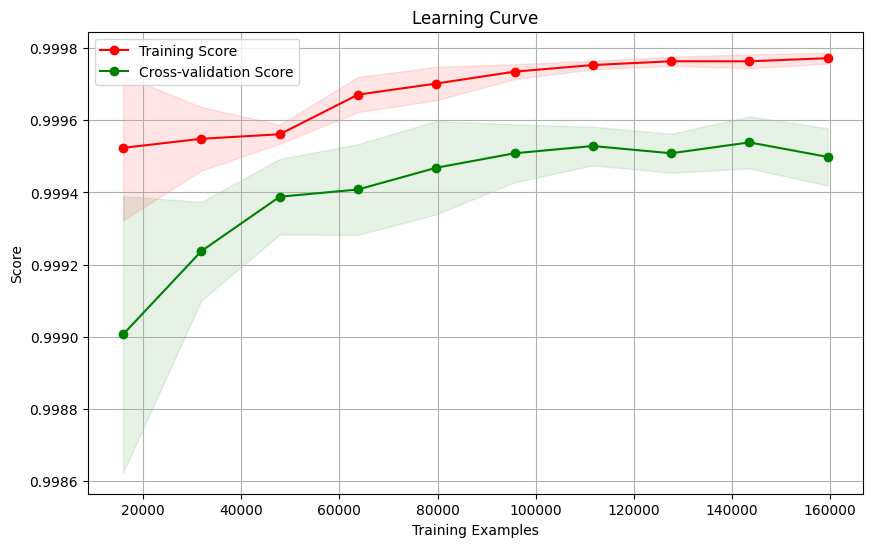

Train Sizes: [ 15949  31898  47847  63796  79745  95694 111643 127592 143541 159491]
Train Scores Mean: [0.99952348 0.99954856 0.9995611  0.99967083 0.99970155 0.99973457
 0.99975278 0.99976331 0.99976313 0.99977177]
Test Scores Mean: [0.99900684 0.99923757 0.99938805 0.99940812 0.99946831 0.99950844
 0.9995285  0.99950844 0.99953853 0.9994984 ]


In [154]:
def plot_learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes, n_jobs=-1)
    # Calculate the mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()
    # Print additional information
    print("Train Sizes:", train_sizes)
    print("Train Scores Mean:", train_scores_mean)
    print("Test Scores Mean:", test_scores_mean)
plot_learning_curve(xgb_clf, X_train, y_train)

*   訓練分數的平均值逐漸增加，這表示隨著訓練集的樣本數量增加，模型在訓練集上的表現也在逐漸提高。

*   交叉驗證分數的平均值逐漸增加，這表示隨著訓練集的樣本數量增加，模型在交叉驗證集上的泛化能力也在逐漸提高，雖然驗證分數的波動性較大，但總體趨勢是增加的。

*   兩條曲線之間的差距較小，進一步說明訓練和驗證的結果都非常好，也表明模型沒有明顯的overfitting，隨著訓練樣本數量的增加，模型進一步提升並趨於穩定，顯示良好的泛化能力



